In [18]:
import os
import pickle
from glob import glob
import numpy as np
import torch
import pandas as pd
from fsl.data.image import Image
from fsl.utils.image.resample import resampleToPixdims
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [19]:
path = 'T1_brain_to_MNI.pkl'
data = pd.read_pickle(path)
data.head()

,min,max,mean,med,std,1p,25p,75p,99p,norm99p
21708942,0.0,2589.0,209.738480,0.0,367.717957,0.0,0.0,353.0,1151.0,5.487786
23425368,-44.0,2642.0,210.876617,0.0,376.318481,0.0,0.0,304.0,1199.0,5.685789
22943860,-62.0,3286.0,256.851654,0.0,454.164612,0.0,0.0,392.0,1440.0,5.606349
24837551,-42.0,3052.0,255.241486,0.0,449.388306,0.0,0.0,406.0,1403.0,5.496755
25243303,-26.0,2869.0,219.785309,0.0,387.052673,0.0,0.0,365.0,1232.0,5.605470


In [22]:
def get_array(df,col):
    return df.loc[:][col].values

def stats_calc(df,col):
    arr = get_array(df,col)
    return np.min(arr), np.max(arr), np.mean(arr), np.median(arr), np.std(arr)

def plot_hist(df, col, title=None):
    array = get_array(df, col)
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    ax.grid(axis='y', alpha = 0.75, b=True, which='major', linestyle='-')
    ax.hist(array, bins=50, color='blue', alpha=0.7, rwidth=0.85)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
#     plt.title(title)
    fig.patch.set_facecolor('xkcd:white')
    _,_,mean,_,std = stats_calc(df, col)
    if col == 'min':
        thr = mean - 2 * std
    elif col=='max':
        thr = mean + 2 * std
    if col == 'min' or col =='max':
        ax.axvline(x=thr, color='r', linestyle='dashed', linewidth=2)
    else:
        ax.axvline(x=mean, color='r', linestyle='dashed', linewidth=2)
    plt.savefig(title+'_'+col+'_Hist'+'.png', dpi=300, bbox_inches="tight")
    # plt.savefig(title+'_'+col+'_Hist'+'.png', dpi=300, facecolor='none', bbox_inches="tight")

def plot_bars(df, labels_list, title=None):
    array_list = get_array(df,labels_list)
#     fig = plt.figure(figsize=(8,6))
    fig, ax = plt.subplots(figsize=(8,6))
#     ax.set_title(title)
    ax.grid(axis='y', alpha = 0.75)
    ax.boxplot(array_list)
    ax.set_xticklabels(labels_list)
    # ax.set_xticklabels(['0', '1', '2','3','4','5', '25', '50', '75','95', '96', '97','98','99', '100'])
    plt.xlabel('Percentile')
    plt.ylabel('Values')
    plt.grid(axis='y', alpha = 0.75)
    fig.patch.set_facecolor('xkcd:white')
    # plt.savefig(title+'_'+'_Bar'+'.png', dpi=300, facecolor='none', bbox_inches="tight")
    plt.savefig(title+'_'+'_Bar'+'.png', dpi=300, bbox_inches="tight")
    # plt.savefig(title+' UKBB'+'.png')

In [23]:
print('Stats (min, max, mean, med, std) for MIN: ', stats_calc(data, 'min'))
print('Stats (min, max, mean, med, std) for MAX: ', stats_calc(data, 'max'))
print('Stats (min, max, mean, med, std) for NORM99p: ', stats_calc(data, 'norm99p'))

Stats (min, max, mean, med, std) for MIN:  (-317.0, 0.0, -39.18345069668886, -35.0, 25.01042724437604)
Stats (min, max, mean, med, std) for MAX:  (203.0, 4933.0, 2858.6320712313523, 2803.0, 614.4051663045856)
Stats (min, max, mean, med, std) for NORM99p:  (4.859483242034912, 6.554054260253906, 5.550105992097339, 5.536064147949219, 0.13989556597410857)


In [24]:
_,_,mean,_,std = stats_calc(data, 'min')
print(mean-2*std)
_,_,mean,_,std = stats_calc(data, 'max')
print(mean+2*std)

-89.20430518544094
4087.442403840523


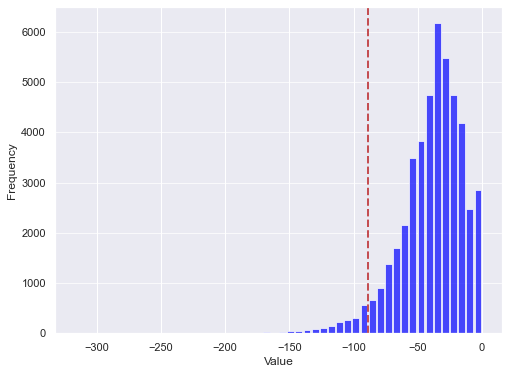

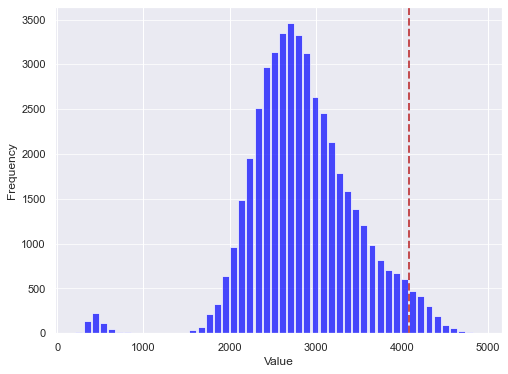

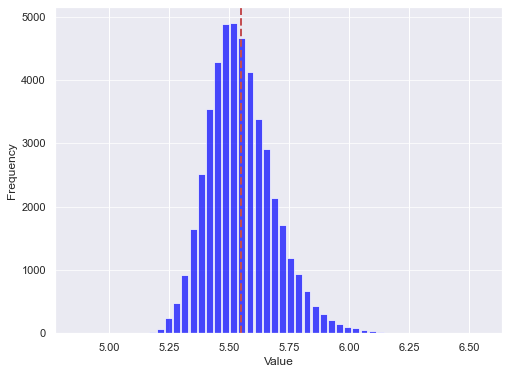

In [25]:
plot_hist(data, 'min', title='T1_Min_Value_Distribution')
plot_hist(data, 'max', title='T1_Max_Value_Distribution')
plot_hist(data, 'norm99p', title='T1_norm99p_Value_Distribution')

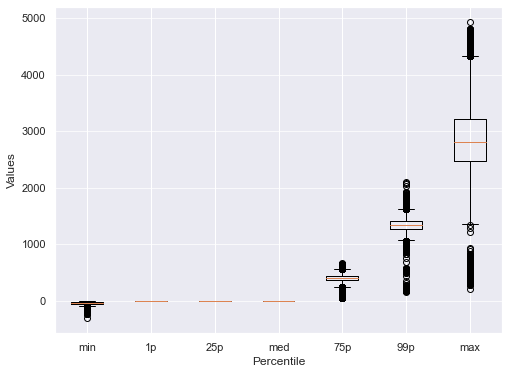

In [26]:
plot_bars(data, ['min', '1p', '25p', 'med', '75p','99p', 'max'], 'T1_Voxel_Intensity_Value_Distribution')

In [32]:
data['min_corrected'] = data['min'] / data['mean']
data['max_corrected'] = data['max'] / data['mean']

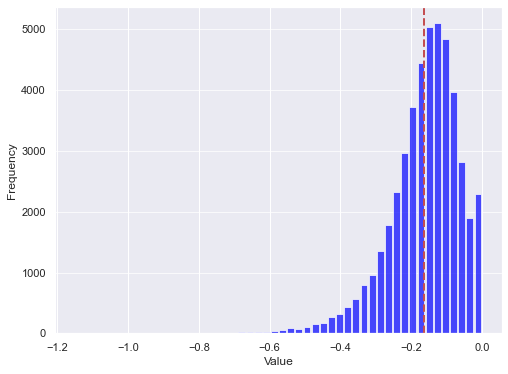

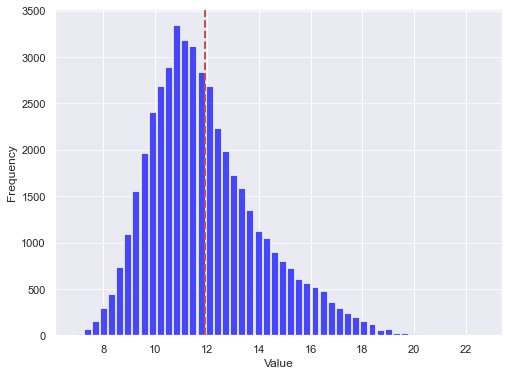

In [33]:
plot_hist(data, 'min_corrected', title='T1_Min_C_Value_Distribution')
plot_hist(data, 'max_corrected', title='T1_Max_C_Value_Distribution')

In [34]:
data['min_norm'] = data['min_corrected'] / np.mean(data['norm99p'])
data['max_norm'] = data['max_corrected'] / np.mean(data['norm99p'])

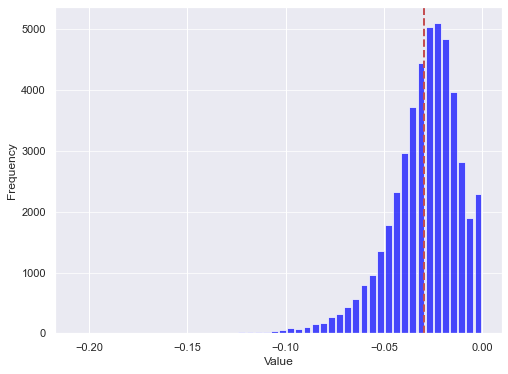

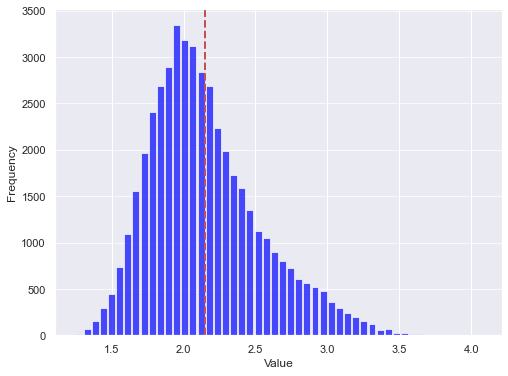

In [36]:
plot_hist(data, 'min_norm', title='T1_Min_N_Value_Distribution')
plot_hist(data, 'max_norm', title='T1_Max_N_Value_Distribution')